# IMPORTING NECESSARY LIBRARIES

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
c = ['id','location','sentiment','text']
data = pd.read_csv('twitter_training.csv',names = c)
data = data.drop(['id','location'],axis=1)
data

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [3]:
data = data.replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':3})
data

,sentiment,text
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74682 non-null  int64 
 1   text       73996 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

sentiment      0
text         686
dtype: int64

In [6]:
data = data.dropna(axis =0)
data

,sentiment,text
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [7]:
data.isnull().sum()

sentiment    0
text         0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

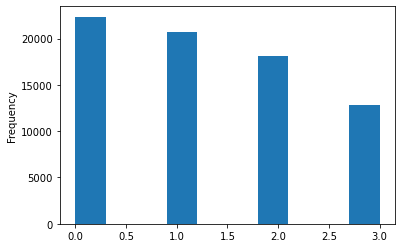

In [8]:
data.sentiment.plot.hist()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

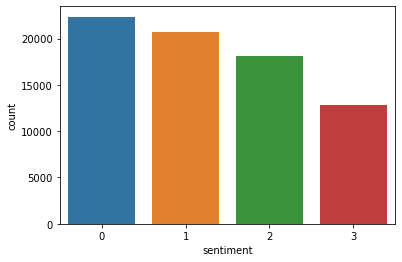

In [9]:
sns.countplot(data['sentiment'])

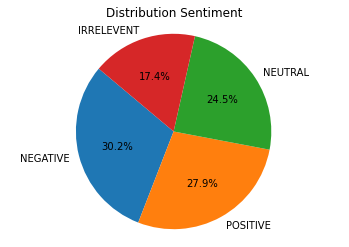

In [10]:
counts = data['sentiment'].value_counts()
labels = ['NEGATIVE','POSITIVE','NEUTRAL','IRRELEVENT']
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution Sentiment')
plt.show()

In [11]:
text, sentiment = list(data['text']), list(data['sentiment'])

In [17]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhuva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')

In [19]:
def preprocess(textdata):
    processedText = []
    wordLemm = WordNetLemmatizer()
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhuva\AppData\Roaming\nltk_data...


True

In [22]:
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')

Text Preprocessing complete.


# SPLIT DATASET INTO TRAIN AND TEST

In [23]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.2, random_state = 0)
print(f'Data Split done.')

Data Split done.


# SCALING - TFIDF

In [24]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=700000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

In [25]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


# MODEL TRAINING AND TESTING

In [26]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4445
           1       0.89      0.90      0.90      4207
           2       0.90      0.88      0.89      3607
           3       0.94      0.84      0.88      2541

    accuracy                           0.90     14800
   macro avg       0.90      0.89      0.89     14800
weighted avg       0.90      0.90      0.89     14800

[[4159  134  114   38]
 [ 211 3799  132   65]
 [ 229  172 3164   42]
 [ 161  160   94 2126]]


<AxesSubplot:>

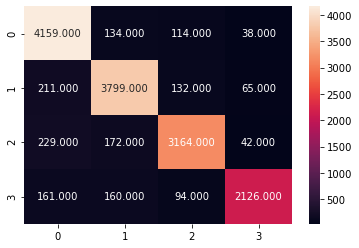

In [27]:
sns.heatmap(cf_matrix,annot=True,fmt='.3f')